In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
ch42=pd.read_csv("C:/gskim/P4DS/data/ch42.csv")
print(ch42)

     com  satis
0   com1     87
1   com1     85
2   com1     78
3   com1     82
4   com2     71
5   com2     82
6   com2     75
7   com2     80
8   com3     66
9   com3     74
10  com3     79
11  com4     65
12  com4     69
13  com4     67
14  com4     63


In [2]:
moore_lm=ols('satis~C(com, Sum)', data=ch42).fit()
table=sm.stats.anova_lm(moore_lm,typ=2) # Type 2 ANOVA DataFrame
print(table)

                 sum_sq    df        F    PR(>F)
C(com, Sum)  607.733333   3.0  9.85998  0.001887
Residual     226.000000  11.0      NaN       NaN


In [3]:
from statsmodels.stats.multicomp import MultiComparison
mc=MultiComparison(ch42['satis'], ch42['com'])
result=mc.tukeyhsd()
print(result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  com1   com2     -6.0 0.2938  -15.647  3.647  False
  com1   com3    -10.0 0.0611 -20.4199 0.4199  False
  com1   com4    -17.0 0.0012  -26.647 -7.353   True
  com2   com3     -4.0 0.6529 -14.4199 6.4199  False
  com2   com4    -11.0 0.0247  -20.647 -1.353   True
  com3   com4     -7.0 0.2379 -17.4199 3.4199  False
----------------------------------------------------


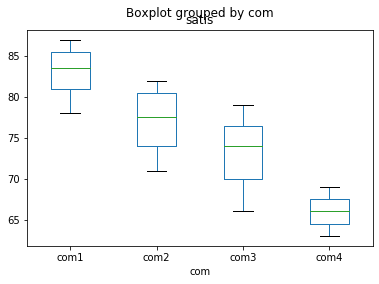

In [4]:
# Bring them in dataframe-format
df = pd.DataFrame(ch42, columns=['com', 'satis'])
df.boxplot(column = 'satis', by='com' , grid = False)
plt.show()

In [5]:
import pandas as pd
import math
import numpy
import plotly.express
import plotly.offline
import scipy
import statsmodels.api
import statsmodels.formula.api
import patsy.contrasts

In [6]:
plotly.offline.init_notebook_mode(connected = True)

In [7]:
# boxplots of y by group
plotly.offline.iplot(
    plotly.express.box(ch42, x = "com", y = "satis")
)